In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\TopMentor\KNN_Regressor\iphone_purchase_records.csv")  # or create manually
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [2]:
print(df.info())
print(df.describe())
print(df['Purchase Iphone'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB
None
              Age         Salary  Purchase Iphone
count  400.000000     400.000000       400.000000
mean    37.655000   69742.500000         0.357500
std     10.482877   34096.960282         0.479864
min     18.000000   15000.000000         0.000000
25%     29.750000   43000.000000         0.000000
50%     37.000000   70000.000000         0.000000
75%     46.000000   88000.000000         1.000000
max     60.000000  150000.000000         1.000000
Purchase Iphone
0    257
1    143
Name: count, dtype: int64


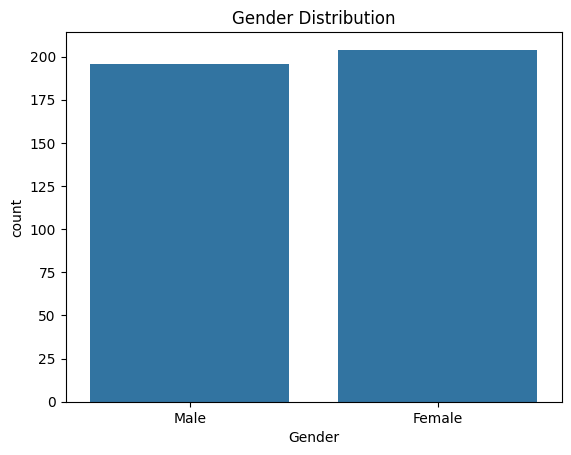

In [3]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()


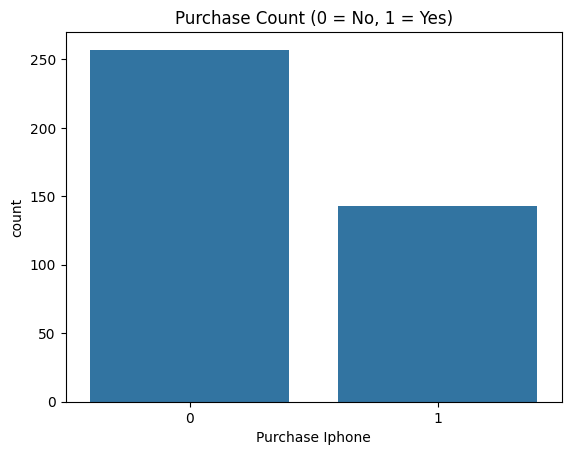

In [4]:
sns.countplot(x='Purchase Iphone', data=df)
plt.title("Purchase Count (0 = No, 1 = Yes)")
plt.show()


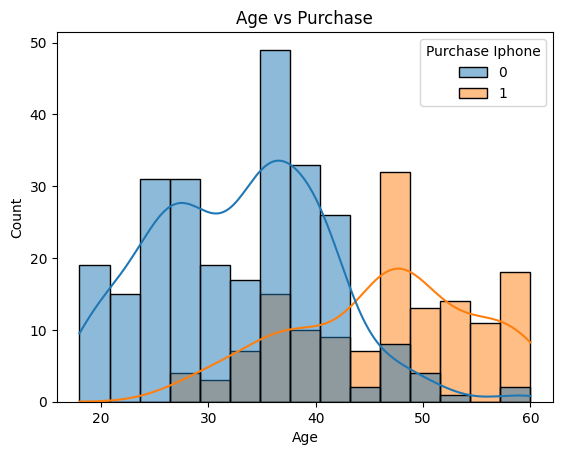

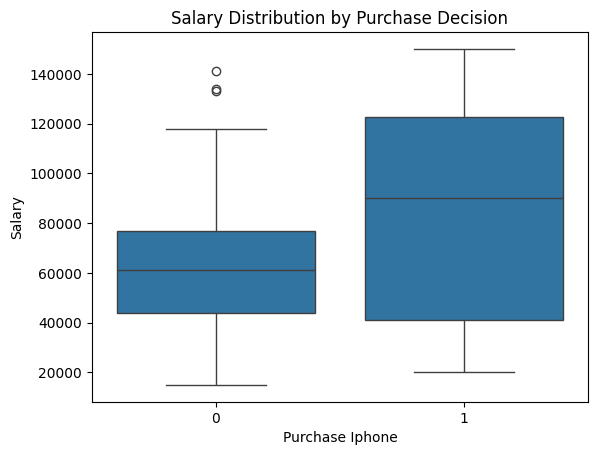

In [5]:
sns.histplot(data=df, x='Age', hue='Purchase Iphone', kde=True, bins=15)
plt.title("Age vs Purchase")
plt.show()
sns.boxplot(x='Purchase Iphone', y='Salary', data=df)
plt.title("Salary Distribution by Purchase Decision")
plt.show()


In [6]:
# Convert Gender to numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Feature-target split
X = df[['Gender', 'Age', 'Salary']]
y = df['Purchase Iphone']


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8875

Confusion Matrix:
 [[50  2]
 [ 7 21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80

